# Теоретический материал — Нейронные сети

## Обучение персептрона

Персептрон представляет собой **элементарную часть нейронной сети**. Одиночный персептрон является **линейным бинарным классификатором**.

В этой лекции мы рассмотрим процедуру обучения персептрона для классификации данных. Поскольку персептрон представляет собой бинарный классификатор, мы будем рассматривать лишь два класса.

### Постановка задачи

Пусть у нас есть некоторое множество (конечное или бесконечное) **n-мерных векторов**, которые будем обозначать:

> **x = (x₁, x₂, ..., xₙ)**

Будем считать, что это множество разбивается на два класса, которые мы будем обозначать **+1** и **-1**.  
Задача — построить функцию, которая на нашем множестве векторов принимает значения в множестве **{+1, -1}**.

Такой функцией может выступать **персептрон**.

С алгебраической точки зрения, персептрон состоит из вектора весов:

> **w = (w₀, w₁, w₂, ..., wₙ)**

### Как работает персептрон?

Персептрон работает по формуле:

> **y = sign(w₀ + x₁w₁ + x₂w₂ + ... + xₙwₙ)**

где функция `sign(t)` определяется следующим образом:

- **+1**, если *t ≥ 0*
- **−1**, если *t < 0*

---

### Алгоритм обучения персептрона

Пусть у нас есть набор обучающих данных `{(x, d)}`, где:
- **x** — входной вектор,
- **d** ∈ **{+1, -1}** — правильный ответ (метка класса).

Алгоритм обучения:

1.  Инициализировать вектор весов `w` нулями.
2.  Повторять до сходимости или максимума итераций:
3.  Для каждого обучающего примера `(x, d)`:
4.  Вычислить предсказание:
   `y = sign(w₀ + x₁w₁ + ... + xₙwₙ)`  
   (или `y = sign(w · x̃)`, где `x̃ = (1, x₁, ..., xₙ)`)
5.  Если `y ≠ d` (ошибка классификации), обновить веса:

   > **w₀ ← w₀ + α·d**  
   > **wᵢ ← wᵢ + α·d·xᵢ**, для *i = 1, 2, ..., n*

   где **α > 0** — коэффициент обучения (learning rate).

---

 Описанный алгоритм довольно легко программировать.


### 1.1.1 Пример

#### Задача:
Рассмотрим программу обучения персептрона на языке Python. Сначала рассмотрим основной класс персептрона, который умеет учиться по тестовым данным.

#### Решение:
Начнем с описания объектов класса:

```python
# класс, который реализует персептрон и его обучение
class Perceptron:
    def __init__(self, N):
        # создать нулевые веса
        self.w = list()
        for i in range(N):
            self.w.append(0)

    # метод для вычисления значения персептрона
    def calc(self, x):
        res = 0
        for i in range(len(self.w)):
            res = res + self.w[i] * x[i]
        return res

    # пороговая функция активации персептрона
    def sign(self, x):
        if self.calc(x) > 0:
            return 1
        else:
            return -1

    # обучение на одном примере
    def learn(self, la, x, y):
        # обучаем только, когда результат неверный
        if y * self.calc(x) <= 0:
            for i in range(len(self.w)):
                self.w[i] = self.w[i] + la * y * x[i]

    # обучение по всем данным T - кортеж примеров
    def learning(self, la, T):
        # цикл обучения
        for n in range(100):
            # обучение по всем набору примеров
            for t in T:
                self.learn(la, t[0], t[1])
```
В строке 25 мы осуществляем корректировку весов. Посмотрим, как учится и работает наш персептрон.
```python
# создаем класс двумерного персептрона
perceptron = Perceptron(2)
la = 0.1  # константа обучения

# создаем примеры
T = list()
T.append([[2,1], 1])
T.append([[3,2], 1])
T.append([[4,1], 1])
T.append([[1,2], -1])
T.append([[2,3], -1])
T.append([[5,7], -1])

perceptron.learning(la, T)  # обучение персептрона
print(perceptron.w)         # печатаем веса

# проверим работу на тестовых примерах
print(perceptron.sign([1.5, 2]))
print(perceptron.sign([3, 1.5]))
print(perceptron.sign([5,1]))
print(perceptron.sign([5,10]))
```
### Ответ:
```text
[0.1, -0.1]
-1
1
-1
-1
```
Видим, что наш персептрон отлично научился распознавать образы, относя к классу 1 те вектора, у которых первая компонента больше второй, и к классу -1 в противном случае. Хотя устройство персептронов довольно простое, эти конструкции могут решать и практические задачи. Кроме того, из таких персептронов состоят нейронные сети.

## Теоретический материал — Реализация нейронной сети на Python

Нейронная сеть — это функциональная единица машинного или глубокого обучения. Она имитирует поведение человеческого мозга, поскольку основана на концепции биологических нейронных сетей.

Наиболее распространённый тип нейронной сети, называемый многослойным персептроном (MLP), представляет собой функцию, которая отображает входные данные в выходные данные. MLP имеет один входной слой и один выходной слой. Между ними может быть один или несколько скрытых слоёв. Входной слой имеет тот же набор нейронов, что и признаки. Скрытые слои также могут иметь более одного нейрона. Каждый нейрон представляет собой линейную функцию, к которой применяется функция активации для решения сложных задач. Выход каждого слоя подаётся в качестве входных данных для всех нейронов следующих слоёв.

Нейронные сети способны решать множество задач. В основном они состоят из таких компонентов:

- **входной слой** (получение и передача данных);
- **скрытый слой** (вычисление);
- **выходной слой**. Чтобы реализовать нейросеть, необходимо понимать, как ведут себя нейроны. Нейрон одновременно принимает несколько входов, обрабатывает эти данные и выдаёт один выход. Нейронная сеть представляет собой блоки ввода и вывода, где каждое соединение имеет соответствующие веса (это силы связи нейронов; чем больше вес, тем один нейрон сильнее влияет на другой). Данные всех входов умножаются на веса:

  - $ x \rightarrow x \cdot w_1 $
  - $ y \rightarrow y \cdot w_2 $

Входы после взвешивания суммируются с прибавлением значения порога «c»:

$$
xw_1 + yw_2 + c
$$

Полученное значение пропускается через функцию активации (сигмоиду), которая преобразует входы в один выход:

$$
z = f(xw_1 + yw_2 + c)
$$

#### Так выглядит сигмоида:

![Сигмоидная функция](https://camo.githubusercontent.com/289cd3ededab5e7b8da234d2df9c8dc9b36eef55c02594108ed4b67ae8c23532/68747470733a2f2f616268696e61767468756b72616c39372e6769746875622e696f2f4c696e65617253564d436c617373696669636174696f6e2f696d672f7369676d6f69642e6a7067)


Интервал результатов сигмоиды — от 0 до 1. Отрицательные числа стремятся к нулю, а положительные — к единице.

Например, пусть нейрон имеет следующие значения:  
$ w = [0, 1] $, $ c = 4 $.  
Входной слой: $ x = 2 $, $ y = 3 $.

Тогда:

$$
(xw_1) + (yw_2) + c = (2 \cdot 0) + (3 \cdot 1) + 4 = 7
$$

$$
z = f(7) = 0.99
$$

> Значение $ z = 0.99 $ — это результат применения сигмоидной функции к сумме взвешенных входов.

## 1.1.2 Пример

### Решение:
Для написания кода нейрона будем использовать библиотеку Python — `NumPy`.

```python
import numpy as np

def sigmoid(x):
    # функция активации: f(x) = 1 / (1 + e^(-x))
    return 1 / (1 + np.exp(-x))

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

# инициализация нейрона
weights = np.array([0, 1])  # w1 = 0, w2 = 1
bias = 4                    # c = 4

n = Neuron(weights, bias)
x = np.array([2, 3])        # x = 2, y = 3
print(n.feedforward(x))     # 0.9998898948885594
```
### Ответ:
```text
0.9998898948885594
```
Нейросеть состоит из множества соединённых между собой нейронов.
**Пример несложной нейронной сети** — будет рассмотрен далее.

### Схема нейронной сети:

```mermaid
graph LR
    x1((x₁)) --> h1((h₁))
    x1 --> h2((h₂))
    x2((x₂)) --> h1
    x2 --> h2
    h1 --> o1((o₁))
    h2 --> o1
```
где:  
- $ x_1, x_2 $ — входной слой;  
- $ h_1, h_2 $ — скрытый слой с двумя нейронами;  
- $ o_1 $ — выходной слой.

---

Например, представим, что нейроны из графика выше имеют веса $ w = [0, 1] $, пороговое значение $ b = 0 $, и используют сигмоидную функцию активации.

При входных данных $ x = [2, 3] $ получим:

$$
h_1 = h_2 = f(w \cdot x + b) = f\big((0 \cdot 2) + (1 \cdot 3) + 0\big) = f(3) = 0.95
$$

$$
o_1 = f(w \cdot [h_1, h_2] + b) = f\big((0 \cdot h_1) + (1 \cdot h_2) + 0\big) = f(0.95) = 0.72
$$

> Входные данные по нейронам передаются до тех пор, пока не получатся выходные значения.

```python
import numpy as np

class OurNeuralNetwork:
    """
    Нейросеть с:
    - двумя входами (x1, x2)
    - двумя нейронами в скрытом слое (h1, h2)
    - одним выходом (o1)
    
    Все нейроны используют одинаковые веса и порог:
    - w = [0, 1]
    - b = 0
    """

    def __init__(self):
        weights = np.array([0, 1])
        bias = 0

        # Класс Neuron из предыдущего раздела
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)

    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        # Входы для o1: [out_h1, out_h2]
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        return out_o1

# Создаем экземпляр нейросети
network = OurNeuralNetwork()
x = np.array([2, 3])  # x1 = 2, x2 = 3
print(network.feedforward(x))  # 0.7216325609518421
```
---
```text
0.7216325609518421

## Теоретический материал — Обучение нейронной сети

Обучение нейросети — это подбор весов, которые соответствуют всем входам для решения поставленных задач.

### Класс нейронной сети:

```python
class NeuralNetwork:
    def __init__(self, x, y):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1], 4)
        self.weights2 = np.random.rand(4, 1)
        self.y = y
        self.output = np.zeros(y.shape)
```
Каждый этап процесса обучения состоит из:

- **прямого распространения** (прогнозируемый выход);
- **обратного распространения** (обновление весов и смещений).

---

### Пример: Дана двуслойная нейросеть

Формула выхода:

$$
\hat{y} = \sigma(w_2 \sigma(w_1 x + b_1) + b_2)
$$

В данном случае на выход $ \hat{y} $ влияют только две переменные — $ w $ (веса) и $ b $ (смещения). Настройку весов и смещений из данных входа или процесс обучения нейросети можно изобразить так:
```text
     x
     ↓
     ┌────────────┐    ┌─────────────────┐    ┌────────────┐    ┌─────────────────┐    ┌──────────────┐
W ──→│ W₁x + b₁   │───→│ z = σ(W₁x + b₁) │───→│ W₂z + b₂   │───→│ ŷ = σ(W₂z + b₂) │───→│  Loss(ŷ, y)  │
     └────────────┘    └─────────────────┘    └────────────┘    └─────────────────┘    └──────────────┘
     ↑           
     b       
```

---
## Прямое распространение

Как видно, формула прямого распространения представляет собой несложное вычисление:

$$
\hat{y} = \sigma(w_2 \sigma(w_1 x + b_1) + b_2)
$$

Далее необходимо добавить в код функцию прямого распространения.  
Предположим, что смещения в этом случае будут равны 0.
```python
class NeuralNetwork:
    def __init__(self, x, y):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1], 4)
        self.weights2 = np.random.rand(4, 1)
        self.y = y
        self.output = np.zeros(self.y.shape)

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
```
Чтобы вычислить ошибку прогноза, необходимо использовать функцию потери. В примере уместно воспользоваться формулой суммы квадратов ошибок — средним значением между прогнозируемым и фактическим результатами:

$$
Error = \sum_{i=1}^{n} (y - \hat{y})^2
$$

---
## Обратное распространение

Обратное распространение позволяет измерить производные в обратном порядке — от конца к началу, и скорректировать веса и смещения.  
Для этого необходимо узнать производную функции потери — тангенс угла наклона.

![График функции потерь](https://www.nomidl.com/wp-content/uploads/2022/08/image-204.png)

Производная функции по отношению к весам и смещениям позволяет узнать **градиентный спуск**.  
Производная функции потери не содержит весов и смещений, для её вычисления необходимо добавить правило цепи:

$$
Loss(y, \hat{y}) = \sum_{i=1}^{n} (y - \hat{y})^2
$$

$$
\frac{\partial Loss(y, \hat{y})}{\partial W} = \frac{\partial Loss(y, \hat{y})}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z} \cdot \frac{\partial z}{\partial W} =
$$

$$
= 2(y - \hat{y}) \cdot \text{производную сигмоиды} \cdot x =
$$

$$
= 2(y - \hat{y}) \cdot z(1 - z) \cdot x,
$$

где $ z = Wx + b $.

Благодаря этому правилу можно регулировать веса. Добавляем в код функцию обратного распространения:

```python
class NeuralNetwork:
    def __init__(self, x, y):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1], 4)
        self.weights2 = np.random.rand(4, 1)
        self.y = y
        self.output = np.zeros(self.y.shape)

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

    def backprop(self):
        # производная цены для нахождения производной функции потерь по весу 2
        d_weights2 = np.dot(self.layer1.T, (2 * (self.y - self.output) * sigmoid_derivative(self.output)))
        # производная цены для нахождения производной функции потерь по весу 1
        d_weights1 = np.dot(self.input.T, (np.dot(2 * (self.y - self.output) * sigmoid_derivative(self.output), 
                                                   self.weights2.T) * sigmoid_derivative(self.layer1)))

        # обновление весов (наклон) функции потерь
        self.weights1 += d_weights1
        self.weights2 += d_weights2
```
>Нейронные сети базируются на определенных алгоритмах и
математических функциях. Сначала может казаться, что разобраться в них
довольно сложно. Но существуют готовые библиотеки машинного обучения
для построения и тренировки нейросетей, позволяющие не углубляться в их
устройство

## Задание:

Реализовать классы нейросетей по аналогии с классом `OurNeuralNetwork`.

### Данные нейросети 1:
- три входа ($x_1, x_2, x_3$);
- три нейрона в скрытых слоях ($h_1, h_2, h_3$);
- выход ($o_1$).

Нейроны имеют идентичные веса и пороги:
- $ w = [0.5, 0.5, 0.5] $
- $ b = 0 $

---

### Данные нейросети 2:
- два входа ($x_1, x_2$);
- два нейрона в скрытых слоях ($h_1, h_2$);
- два выхода ($o_1, o_2$).

Нейроны имеют идентичные веса и пороги:
- $ w = [1, 0] $
- $ b = 1 $

  
### Решение:

In [4]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

# Первая нейросеть: 3 входа → 3 скрытых нейрона → 1 выход
class NeuralNetwork1:
    def __init__(self):
        weights = np.array([0.5, 0.5, 0.5])
        bias = 0
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.h3 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)

    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h3.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2, out_h3]))
        return out_o1

# Вторая нейросеть: 2 входа → 2 скрытых нейрона → 2 выхода
class NeuralNetwork2:
    def __init__(self):
        weights = np.array([1, 0])
        bias = 1
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
        self.o2 = Neuron(weights, bias)

    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        hidden = np.array([out_h1, out_h2])
        out_o1 = self.o1.feedforward(hidden)
        out_o2 = self.o2.feedforward(hidden)
        return np.array([out_o1, out_o2])


net1 = NeuralNetwork1()
x1 = np.array([1, 2, 3])
print("NeuralNetwork1 output:", net1.feedforward(x1))

net2 = NeuralNetwork2()
x2 = np.array([1, 2])
print("NeuralNetwork2 output:", net2.feedforward(x2))

NeuralNetwork1 output: 0.8067238139969796
NeuralNetwork2 output: [0.86770265 0.86770265]


## Задание:

Реализуйте классы нейронных сетей с использованием других функций активации.

### Функции активации и их графики:

#### 1. Sigmoid

Формула:  
$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

![Sigmoid](https://camo.githubusercontent.com/289cd3ededab5e7b8da234d2df9c8dc9b36eef55c02594108ed4b67ae8c23532/68747470733a2f2f616268696e61767468756b72616c39372e6769746875622e696f2f4c696e65617253564d436c617373696669636174696f6e2f696d672f7369676d6f69642e6a7067)

---

#### 2. Tanh

Формула:  
$$
\tanh(x)
$$

![Tanh](https://avatars.mds.yandex.net/i?id=c7a2640772515520160225eaf542b9268841685c-11446590-images-thumbs&n=13)

---

#### 3. ReLU

Формула:  
$$
\max(0, x)
$$

![ReLU](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c5/C0_function.svg/250px-C0_function.svg.png)

> *Примечание:*  
> - Все графики показывают типичную форму функций:  
>   - Sigmoid — плавный S-образный переход от 0 к 1.  
>   - Tanh — аналогичен sigmoid, но в диапазоне [-1, 1].  
>   - ReLU — линейная функция при x > 0, и 0 при x ≤ 0.
### Решение:


In [11]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)  # работает с массивами и скалярами

# === Универсальный нейрон с выбором активации ===
class Neuron:
    def __init__(self, weights, bias, activation_func):
        self.weights = weights
        self.bias = bias
        self.activation = activation_func

    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return self.activation(total)

# === NeuralNetwork1: 3 входа → 3 скрытых → 1 выход ===
class NeuralNetwork1:
    def __init__(self, activation_func):
        weights = np.array([0.5, 0.5, 0.5])
        bias = 0
        self.h1 = Neuron(weights, bias, activation_func)
        self.h2 = Neuron(weights, bias, activation_func)
        self.h3 = Neuron(weights, bias, activation_func)
        self.o1 = Neuron(weights, bias, activation_func)

    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h3.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2, out_h3]))
        return out_o1

x = np.array([2, 3, 4])
net_sigmoid = NeuralNetwork1(sigmoid)
print("Sigmoid output:  ", net_sigmoid.feedforward(x))
net_tanh = NeuralNetwork1(tanh)
print("Tanh output:     ", net_tanh.feedforward(x))
net_relu = NeuralNetwork1(relu)
print("ReLU output:     ", net_relu.feedforward(x))

Sigmoid output:   0.8151036049051821
Tanh output:      0.9050813365686774
ReLU output:      6.75


## 1.2. Введение в нейронные сети с помощью Scikit-Learn в Python

Теперь мы знаем, что такое нейронные сети и какие шаги необходимо выполнить, чтобы построить простую нейронную сеть с плотными связями.  
В этом разделе мы попытаемся построить простую нейронную сеть, которая предсказывает класс, к которому принадлежит данное растение ириса.  
Мы будем использовать библиотеку Python **Scikit-Learn** для создания нашей нейронной сети.

Sklearn предоставляет 2 оценщика для задач классификации и регрессии соответственно:
- `MLPClassifier`
- `MLPRegressor`

Начнём с импорта необходимых библиотек.

```python
# Загрузка библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

## MLPClassifier

### Загрузка данных

Мы будем загружать два набора данных.

**Набор данных цифр**: мы будем использовать набор данных цифр, который имеет изображения размером 8×8 для цифр 0–9.  
**Набор данных о жилье в Бостоне**: мы будем использовать набор данных о жилье в Бостоне, который содержит информацию о различных свойствах дома, таких как среднее количество комнат, уровень преступности на душу населения в городе и т. д. Мы можем использовать его для задач регрессии.

Sklearn предоставляет оба этих набора данных. Мы можем загрузить их, вызвав методы `load_digits()` и `load_boston()`.


In [15]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np

digits = load_digits()
X_digits, Y_digits = digits.data, digits.target
print('Dataset Sizes : ', X_digits.shape, Y_digits.shape)
# Загрузка Boston Housing Dataset вручную
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)
X_boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
Y_boston = raw_df.values[1::2, 2]
print('Dataset Sizes : ', X_boston.shape, Y_boston.shape)

Dataset Sizes :  (1797, 64) (1797,)
Dataset Sizes :  (506, 13) (506,)


## Классификация

### MLPClassifier

`MLPClassifier` — это класс, доступный как часть модуля `neuro_network` библиотеки sklearn для выполнения задач классификации с использованием многослойного персептрона.

Как обычно, разделим набор данных на две части:
- данные обучения, которые будут использоваться для модели;
- тестовые данные, по которым будет проверяться точность обученной модели.

Функция `train_test_split` модуля `model_selection` sklearn поможет нам разделить данные на два набора: 80% для обучения и 20% для тестирования.  
Мы также используем `seed(random_state=123)` с `train_test_split`, чтобы мы всегда получали одно и то же разделение и могли сравнивать и воспроизводить результаты в будущем.


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_digits, Y_digits,
                                                    train_size=0.80, test_size=0.20,
                                                    stratify=Y_digits, random_state=123)
print('Train/Test Sizes : ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test Sizes :  (1437, 64) (360, 64) (1437,) (360,)


Для начала натренируем модель MLPClassifier с параметрами по умолчанию
для тренировочных данных.

In [18]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(random_state=123)
mlp_classifier.fit(X_train, Y_train)

MLPClassifier(random_state=123)

In [19]:
Y_preds = mlp_classifier.predict(X_test)

print(Y_preds[:15])
print(Y_test[:15])

## Метод Score для оценки точности моделей классификации.
print('Test Accuracy : %.3f' % mlp_classifier.score(X_test, Y_test))
print('Training Accuracy : %.3f' % mlp_classifier.score(X_train, Y_train))

[5 9 9 6 1 6 6 9 8 7 4 2 1 4 3]
[5 9 9 6 1 6 6 9 8 7 4 2 1 4 3]
Test Accuracy : 0.983
Training Accuracy : 1.000


Cоздадим метод plot_confusion_matrix(), который принимает исходные и
предсказанные метки данных по модели. Затем он строит матрицу путаницы,
используя matplotlib.

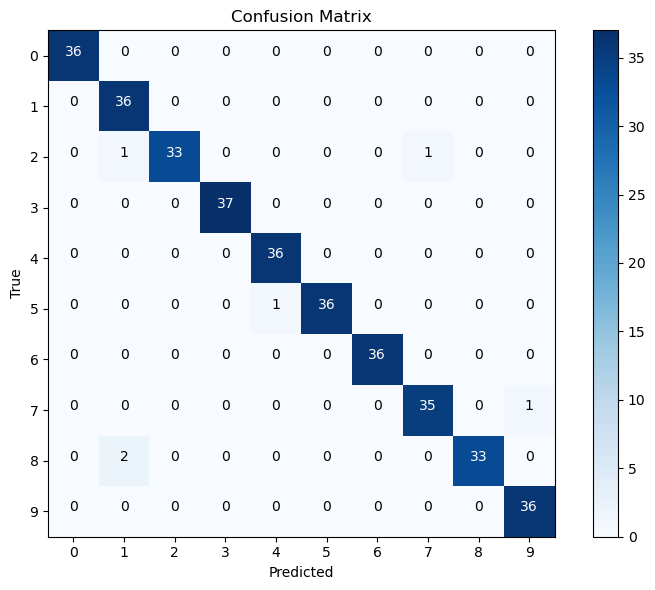

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix(Y_test, Y_preds, class_names=None):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    n_classes = conf_mat.shape[0]
    if class_names is None:
        class_names = list(range(n_classes))
    plt.figure(figsize=(8, 6))
    plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    tick_marks = np.arange(n_classes)
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    thresh = conf_mat.max() / 2.
    for i in range(n_classes):
        for j in range(n_classes):
            plt.text(j, i, str(conf_mat[i, j]),
                     horizontalalignment="center",
                     color="white" if conf_mat[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(Y_test, mlp_classifier.predict(X_test))

Ниже приведён список важных атрибутов, доступных у `MLPClassifier`, которые могут предоставить значимую информацию после обучения модели:

- **`loss_`** — возвращает убыток (значение функции потерь) после завершения процесса обучения.
- **`coefs_`** — возвращает массив длины `n_layers - 1`, где каждый элемент представляет собой матрицу весов, связанную с уровнем `i`.
- **`intercepts_`** — возвращает массив длины `n_layers - 1`, где каждый элемент представляет собой вектор смещений (bias), связанный с персептронами слоя `i`.
- **`n_iter_`** — количество итераций, за которые модель сошлась (завершила обучение).
- **`out_activation_`** — возвращает имя функции активации выходного
слоя.

In [25]:
print("Loss : ", mlp_classifier.loss_)
print("Number of Coefs : ", len(mlp_classifier.coefs_))
print("Number of Intercepts : ", len(mlp_classifier.intercepts_))
print("Number of Iterations for Which Estimator Ran : ", mlp_classifier.n_iter_)
print("Name of Output Layer Activation Function : ", mlp_classifier.out_activation_)

Loss :  0.0034728684994180603
Number of Coefs :  2
Number of Intercepts :  2
Number of Iterations for Which Estimator Ran :  125
Name of Output Layer Activation Function :  softmax


## MLPRegressor

`MLPRegressor` — это класс, доступный как часть библиотеки `neuro_network` sklearn для выполнения задач регрессии с использованием многослойного персептрона.

Также разделим набор данных на две части:
- данные обучения (80%), которые будут использоваться для модели;
- тестовые данные (20%), по которым будет проверяться точность обученной модели.

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X_boston, Y_boston,
                                                    train_size=0.80, test_size=0.20,
                                                    random_state=123)

print('Train/Test Sizes : ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test Sizes :  (404, 13) (102, 13) (404,) (102,)


In [27]:
from sklearn.neural_network import MLPRegressor

mlp_regressor = MLPRegressor(random_state=123)
mlp_regressor.fit(X_train, Y_train)

MLPRegressor(random_state=123)

In [29]:
Y_preds = mlp_regressor.predict(X_test)

print(Y_preds[:10])
print(Y_test[:10])
## Метод Score оценивает точность моделей регрессии (R² score).
print('Test R² Score : %.3f' % mlp_regressor.score(X_test, Y_test))
print('Training R² Score : %.3f' % mlp_regressor.score(X_train, Y_train))

[ 7.32543601 24.33417853 32.46700507 15.19086054 25.6749167  25.07797685
 27.20985668  2.62269853 15.25691994 28.02637784]
[15.  26.6 45.4 20.8 34.9 21.9 28.7  7.2 20.  32.2]
Test R² Score : 0.462
Training R² Score : 0.510


MLPRegressor имеет все атрибуты такие же, как и у MLPClassifier:


In [30]:
print("Loss : ", mlp_regressor.loss_)
print("Number of Coefs : ", len(mlp_regressor.coefs_))
print("Number of Intercepts : ", len(mlp_regressor.intercepts_))
print("Number of Iterations for Which Estimator Ran : ", mlp_regressor.n_iter_)
print("Name of Output Layer Activation Function : ", mlp_regressor.out_activation_)

Loss :  28.53817406111959
Number of Coefs :  2
Number of Intercepts :  2
Number of Iterations for Which Estimator Ran :  130
Name of Output Layer Activation Function :  identity


### Задача:

Используйте классы `MLPClassifier` и `MLPRegressor` для классификации и регрессии произвольных данных из интернета. Проведите анализ атрибутов, полученных моделей.

#### Для классификации:
Можете взять набор данных **Ирисов** (Iris):

🔗 [https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0d4d36c3a/iris.csv](https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0d4d36c3a/iris.csv)


#### Для регрессии:
Датасет зависимости **заработной платы от опыта работы**:

🔗 [https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv](https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv)

### Решение:

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

url = r'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
dataset = pd.read_csv(url)

X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.80, test_size = 0.20, stratify = Y, random_state = 123)

mlp_classifier = MLPClassifier(max_iter = 1000).fit(X_train, Y_train)
Y_pred = mlp_classifier.predict(X_test)

df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
print(df)

print("\nTest Accuracy: %.3f"%mlp_classifier.score(X_test, Y_test))
print('Training Accuracy: %.3f'%mlp_classifier.score(X_train, Y_train))
print(f"\nMatrix of Confusion:\n {confusion_matrix(Y_test, Y_pred)}")
print(f"\nLoss : ", mlp_classifier.loss_)
print(f'Number of Coefs : ', len(mlp_classifier.coefs_))
print(f'Number of Intercepts : ', len(mlp_classifier.intercepts_))
print(f'Number of Iterations for Which Estimator Run : ', mlp_classifier.n_iter_)
print(f'Name of Output Layer Activation Function : ', mlp_classifier.out_activation_)

        Actual   Predicted
0   Versicolor  Versicolor
1       Setosa      Setosa
2    Virginica   Virginica
3    Virginica   Virginica
4       Setosa      Setosa
5       Setosa      Setosa
6    Virginica   Virginica
7   Versicolor   Virginica
8    Virginica   Virginica
9       Setosa      Setosa
10      Setosa      Setosa
11  Versicolor  Versicolor
12   Virginica   Virginica
13  Versicolor  Versicolor
14   Virginica   Virginica
15  Versicolor  Versicolor
16      Setosa      Setosa
17      Setosa      Setosa
18      Setosa      Setosa
19      Setosa      Setosa
20      Setosa      Setosa
21   Virginica   Virginica
22   Virginica   Virginica
23  Versicolor  Versicolor
24   Virginica   Virginica
25   Virginica   Virginica
26  Versicolor  Versicolor
27  Versicolor  Versicolor
28  Versicolor   Virginica
29  Versicolor  Versicolor

Test Accuracy: 0.933
Training Accuracy: 0.992

Matrix of Confusion:
 [[10  0  0]
 [ 0  8  2]
 [ 0  0 10]]

Loss :  0.05286148290614071
Number of Coefs :  2
Number

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

url = r'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
data = pd.read_csv(url)

X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("R2 score: %.2f" % r2_score(y_test, y_pred))

print(mlp.n_layers_)
print(mlp.hidden_layer_sizes)
print(mlp.coefs_)

Mean squared error: 665544160.19
R2 score: 0.39
4
(100, 50)
[array([[ 1.75259840e+00,  1.65626757e+00,  1.75305152e+00,
         1.67165404e+00, -1.34731009e-20,  1.86378855e+00,
        -1.12473193e-01,  1.53593048e+00,  1.81189640e+00,
         1.39262856e-22,  1.49661936e+00, -8.63745726e-18,
         1.90065284e+00,  1.59201095e+00, -4.10619886e-06,
         1.81543197e+00, -4.19220404e-25,  1.00474115e-25,
         1.82808031e+00,  1.70984626e+00, -8.14115966e-02,
        -1.35664217e-20,  1.79050986e+00,  1.88576541e+00,
         1.92948489e+00,  1.92556450e+00,  1.77452975e+00,
         1.59923680e+00,  1.84561478e+00,  1.88635507e+00,
         1.61409395e+00,  1.74710338e+00,  1.56036868e+00,
         1.59323850e+00,  1.53650506e+00,  1.64874174e+00,
         1.88561324e+00,  1.69016566e+00,  1.80260743e+00,
         1.66102317e+00,  1.66392146e+00,  1.71008269e+00,
         4.89326737e-20,  1.87943632e+00,  1.79861171e+00,
         1.89246332e+00,  1.88760725e+00,  1.86160528e

C:\Users\User\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
